In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_location = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname = font_location).get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [3]:
plt.style.use('ggplot')

In [18]:
products= pd.read_excel('재별_및_상품군별_판매액경상지수_201701_202009.xlsx').T

In [19]:
products.columns=products.iloc[0]
products.columns = products.columns.str.replace('　', '')
products=products[2:]
products=products.reset_index().rename(columns={"index": "시점"})

In [23]:
products

재별 및 상품군별,시점,총지수,총지수(승용차 제외),내구재,승용차,국내 승용차,수입 승용차,가전제품,통신기기 및 컴퓨터,통신기기,...,가방,"오락, 취미, 경기용품",기타준내구재,비내구재,음식료품,의약품,화장품,"서적, 문구",차량연료,기타비내구재
0,2017. 01,105.4,107.5,95.4,87.2,87.8,86.3,95.9,102.2,98.9,...,105,83,101.5,113.3,122.7,105.7,122.3,107,98.4,103.6
1,2017. 02,97.2,97.5,101.1,94.6,99.7,84.7,96.9,105.3,96.8,...,111.7,78.6,96.7,98.2,94.7,101.4,120.7,105.5,92,98.7
2,2017. 03,107.5,106.2,114.7,118.8,120.2,116,109,107.4,99.9,...,105.6,98.9,105.2,106.5,103.4,110.6,117.4,135.1,101,108.1
3,2017. 04,105.5,105.4,109.7,105.8,107.9,101.6,117,109.1,112.7,...,103.8,107.8,103.9,102.6,103.2,108.4,105.7,98.1,97.3,104.4
4,2017. 05,109.4,109.5,115.4,108.4,112.8,99.9,143.3,105.3,110.3,...,106.6,111.7,107.2,107.2,107.9,108.9,114.8,96.6,100.4,111.4
5,2017. 06,105.6,104,116.9,119.3,117,123.7,137.9,97.2,100.8,...,99.6,101.8,104.2,104.7,106.7,107,109.7,92.1,96.9,108.7
6,2017. 07,106,106.6,115.8,101.2,107.4,89.4,162,106.4,111.5,...,100.1,102.1,106.1,106.8,110.3,106.7,105.3,102.5,98.7,110.1
7,2017. 08,103.2,103.9,108,97.5,102.2,88.4,130.3,99.3,98.9,...,109.1,96.9,103.1,108.5,112.5,106.9,108.5,103.1,101.9,107.7
8,2017. 09,112.2,112.5,112.8,110,113.7,102.9,113.8,111.1,116.2,...,113.7,107.1,109.1,117.1,126,109.5,127.9,105.3,102.2,109.5
9,2017. 10,110.3,112.4,105.2,92.1,93.6,89.3,125.5,104.9,112.4,...,111.1,114.9,118,109.7,112.6,98.1,116.8,94.4,106.2,110.9


In [24]:
products['시점'] = products['시점'].astype('str').apply(lambda x: x[:4]+'-'+x[5:8])
products['시점']=pd.to_datetime(products['시점'])

In [27]:
types=list(products.columns)[1:]
types

['총지수',
 '총지수(승용차 제외)',
 '내구재',
 '승용차',
 '국내 승용차',
 '수입 승용차',
 '가전제품',
 '통신기기 및 컴퓨터',
 '통신기기',
 '컴퓨터',
 '가구',
 '기타내구재',
 '준내구재',
 '의복',
 '신발 및 가방',
 '신발',
 '가방',
 '오락, 취미, 경기용품',
 '기타준내구재',
 '비내구재',
 '음식료품',
 '의약품',
 '화장품',
 '서적, 문구',
 '차량연료',
 '기타비내구재']

Text(0.5, 1.0, '추이')

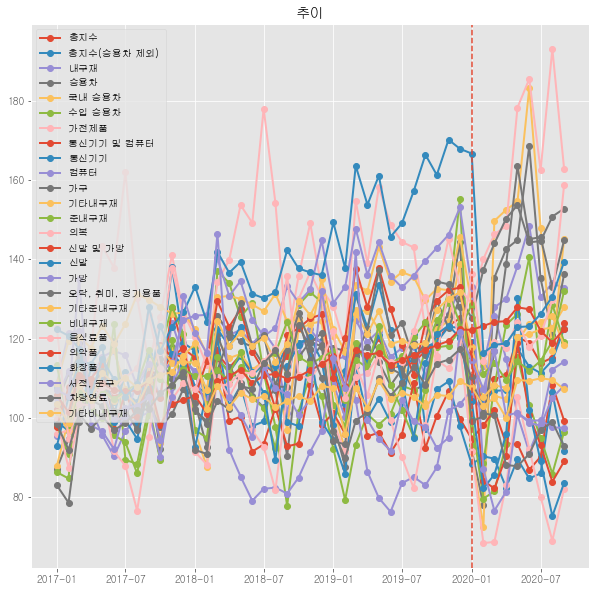

In [30]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
for i in types:
    ax.plot(np.array(products[['시점']]),np.array(products[[i]]),marker='o', linewidth=2,label=products[[i]].columns[0])
ax.axvline(x=products['시점'][36],linestyle ='--') 
ax.legend(loc='upper left')
ax.set_title('추이')

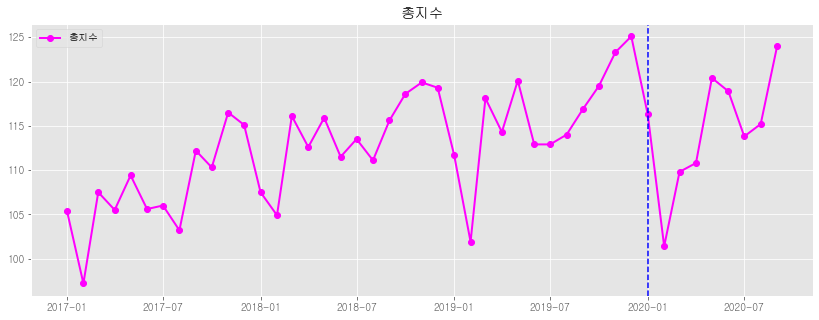

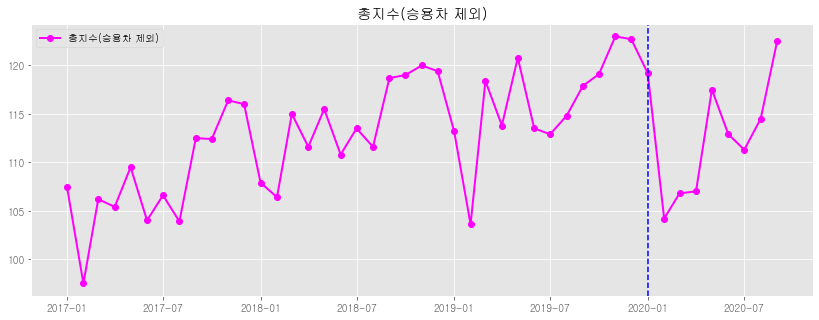

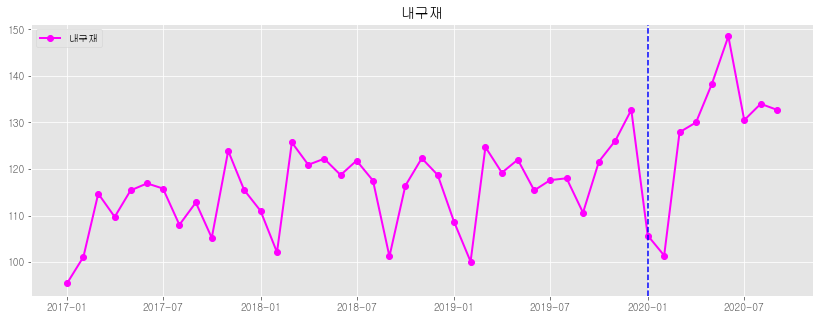

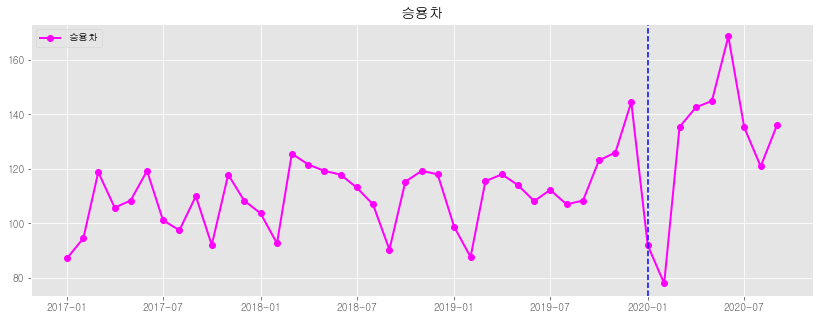

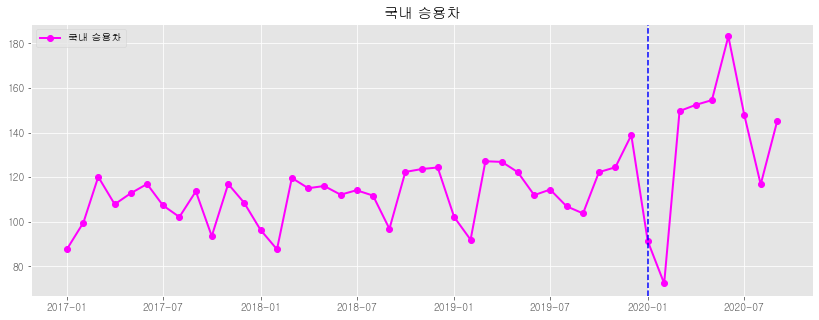

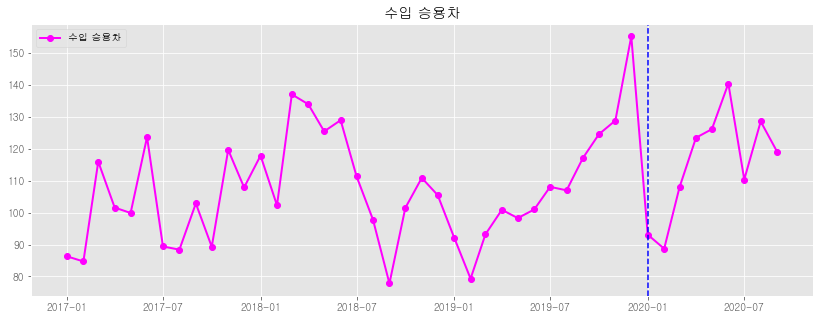

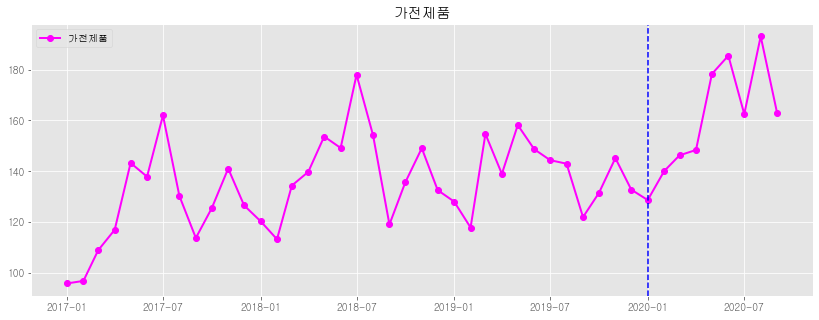

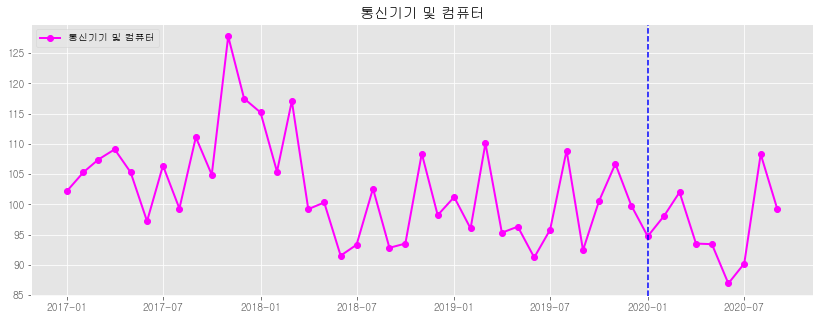

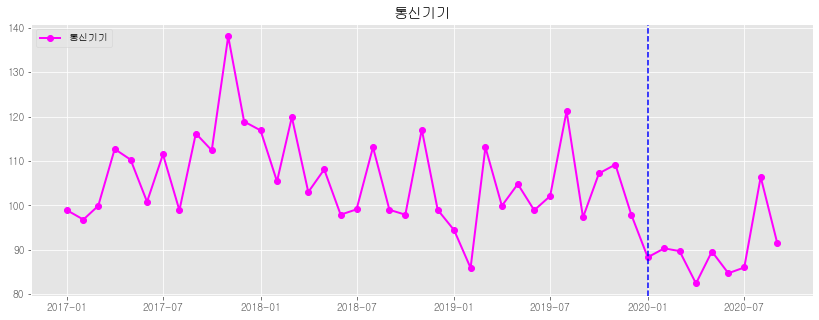

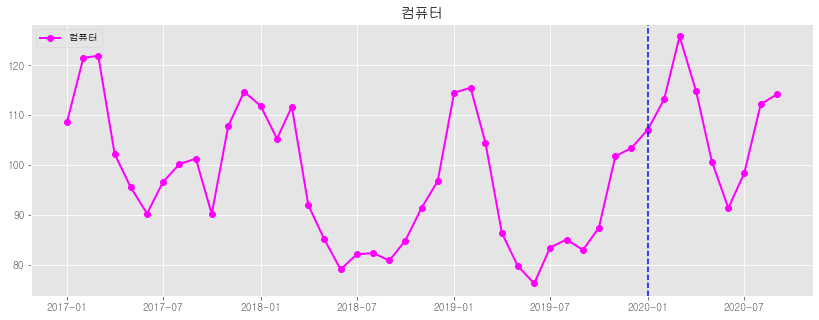

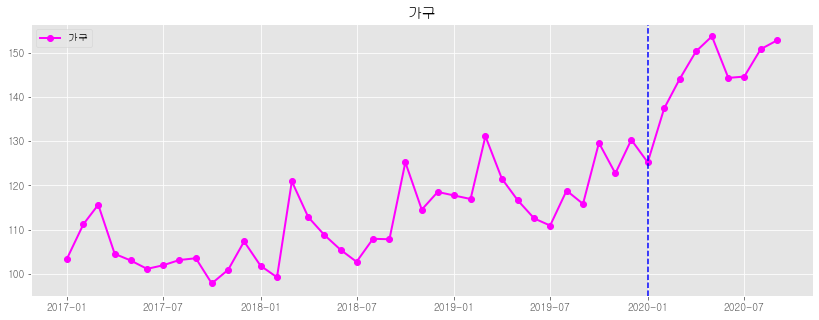

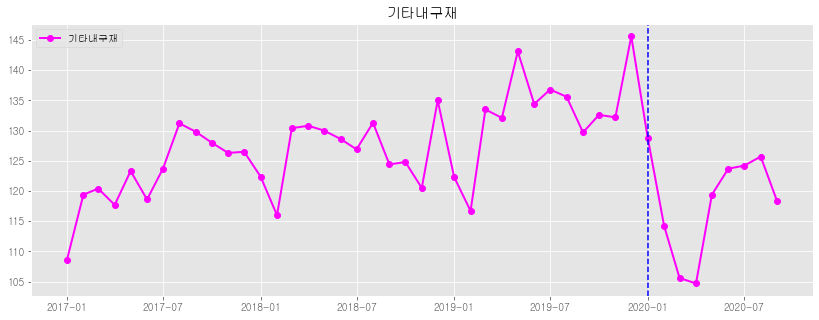

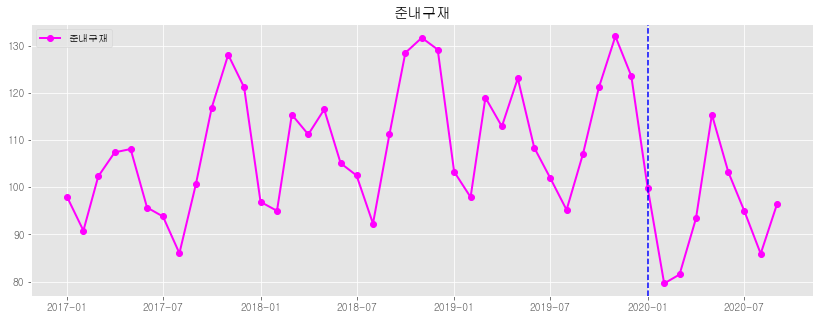

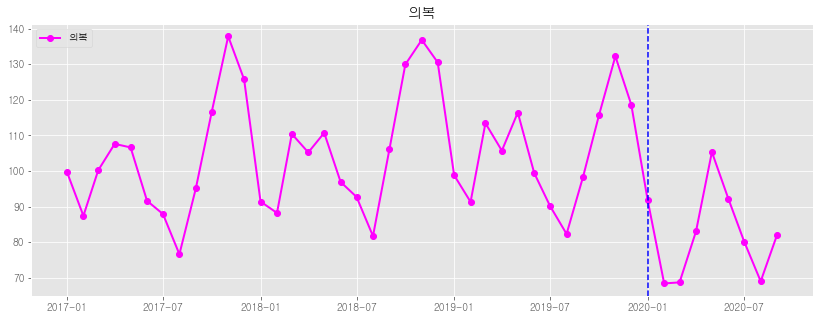

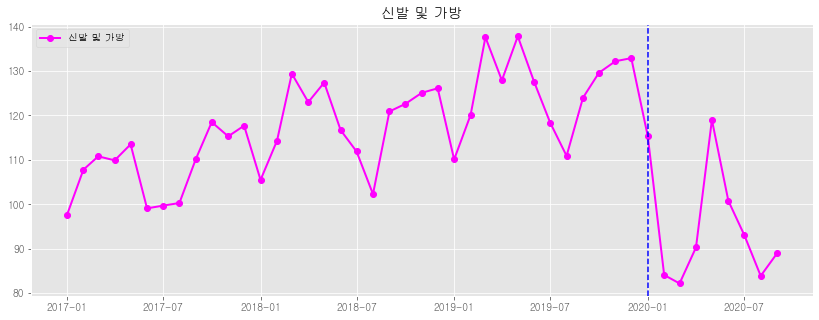

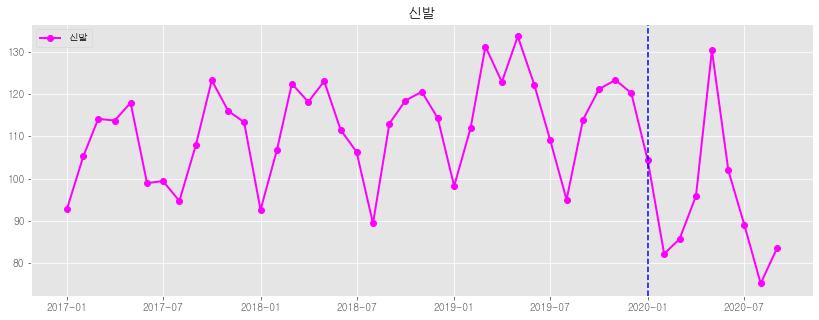

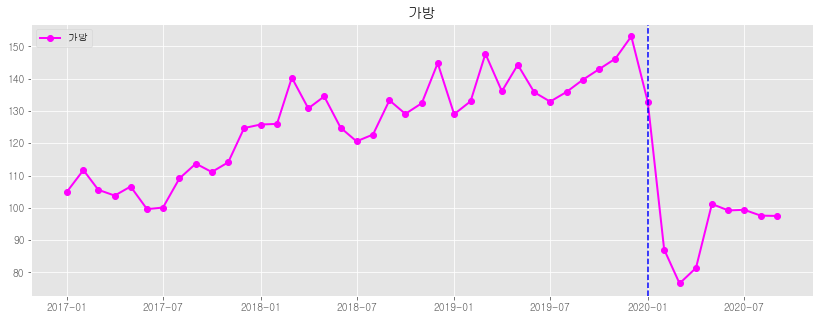

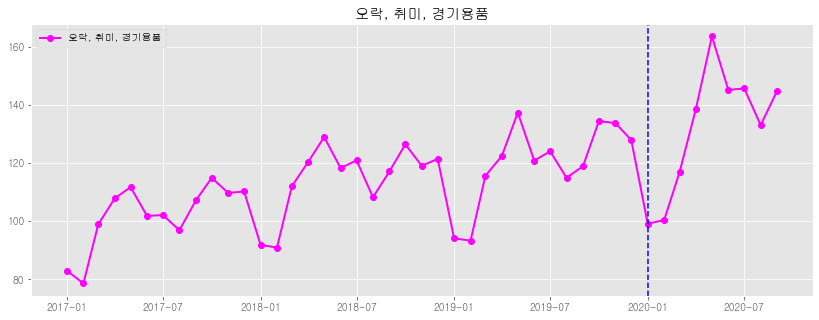

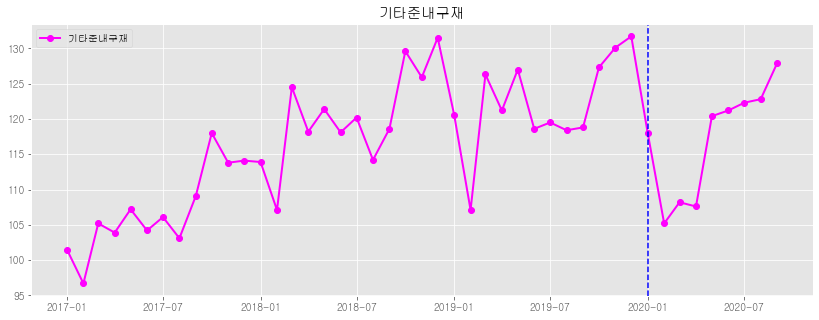

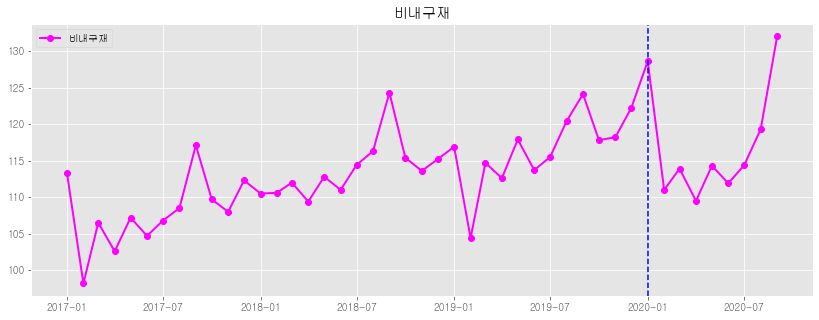

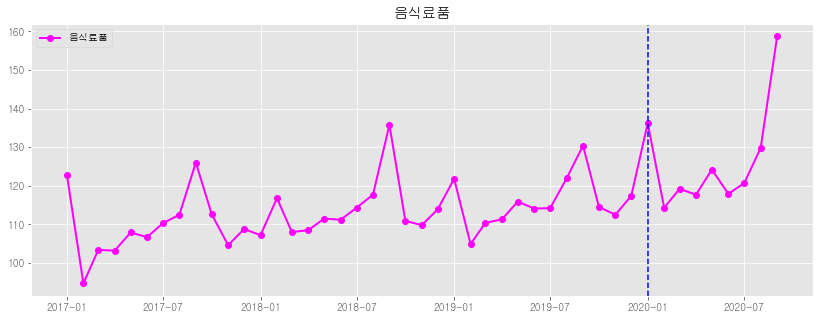

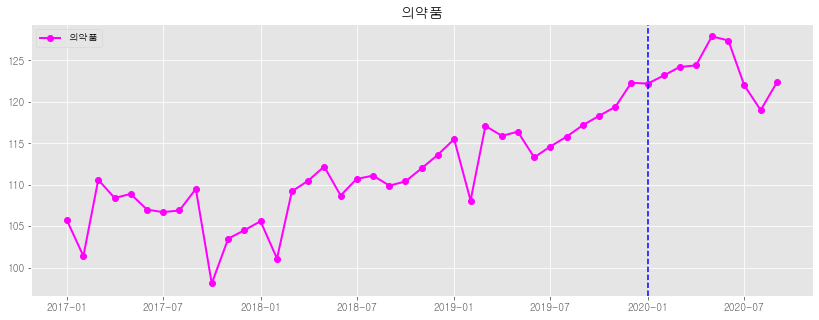

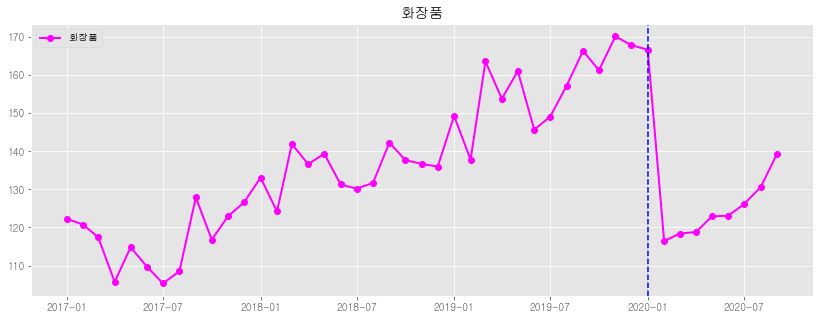

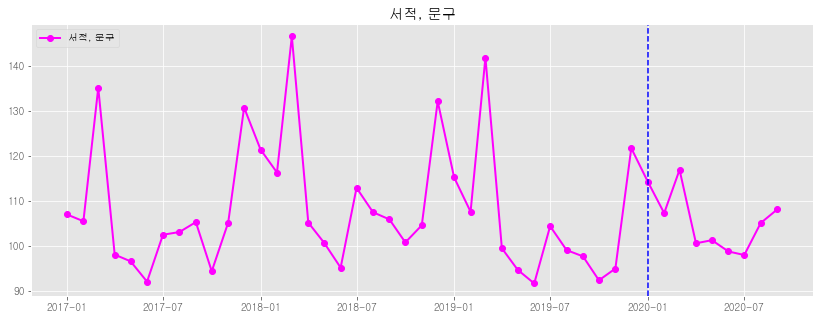

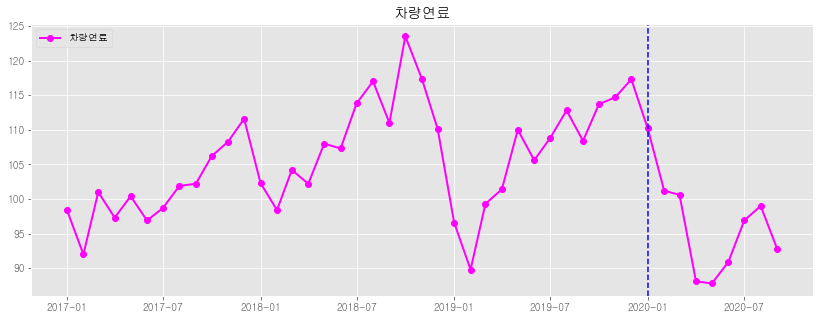

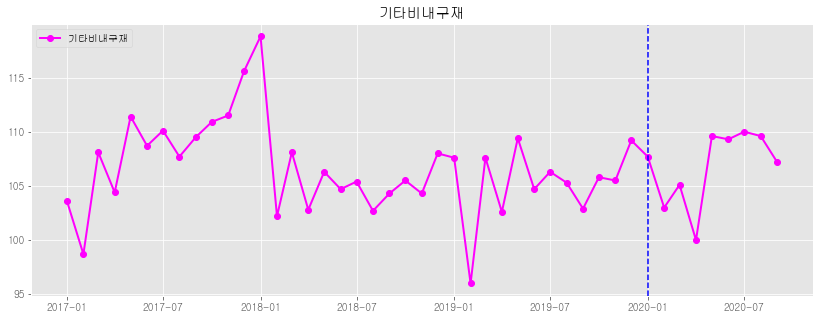

In [34]:
for i in types:
    fig, ax = plt.subplots(1,1,figsize=(14,5))
    ax.plot(np.array(products[['시점']]),np.array(products[i]),marker='o', linewidth=2,label=i,color='magenta')
    ax.axvline(x=products['시점'][36],linestyle ='--',color='blue') 
    ax.legend(loc='upper left')
    ax.set_title(i)
    


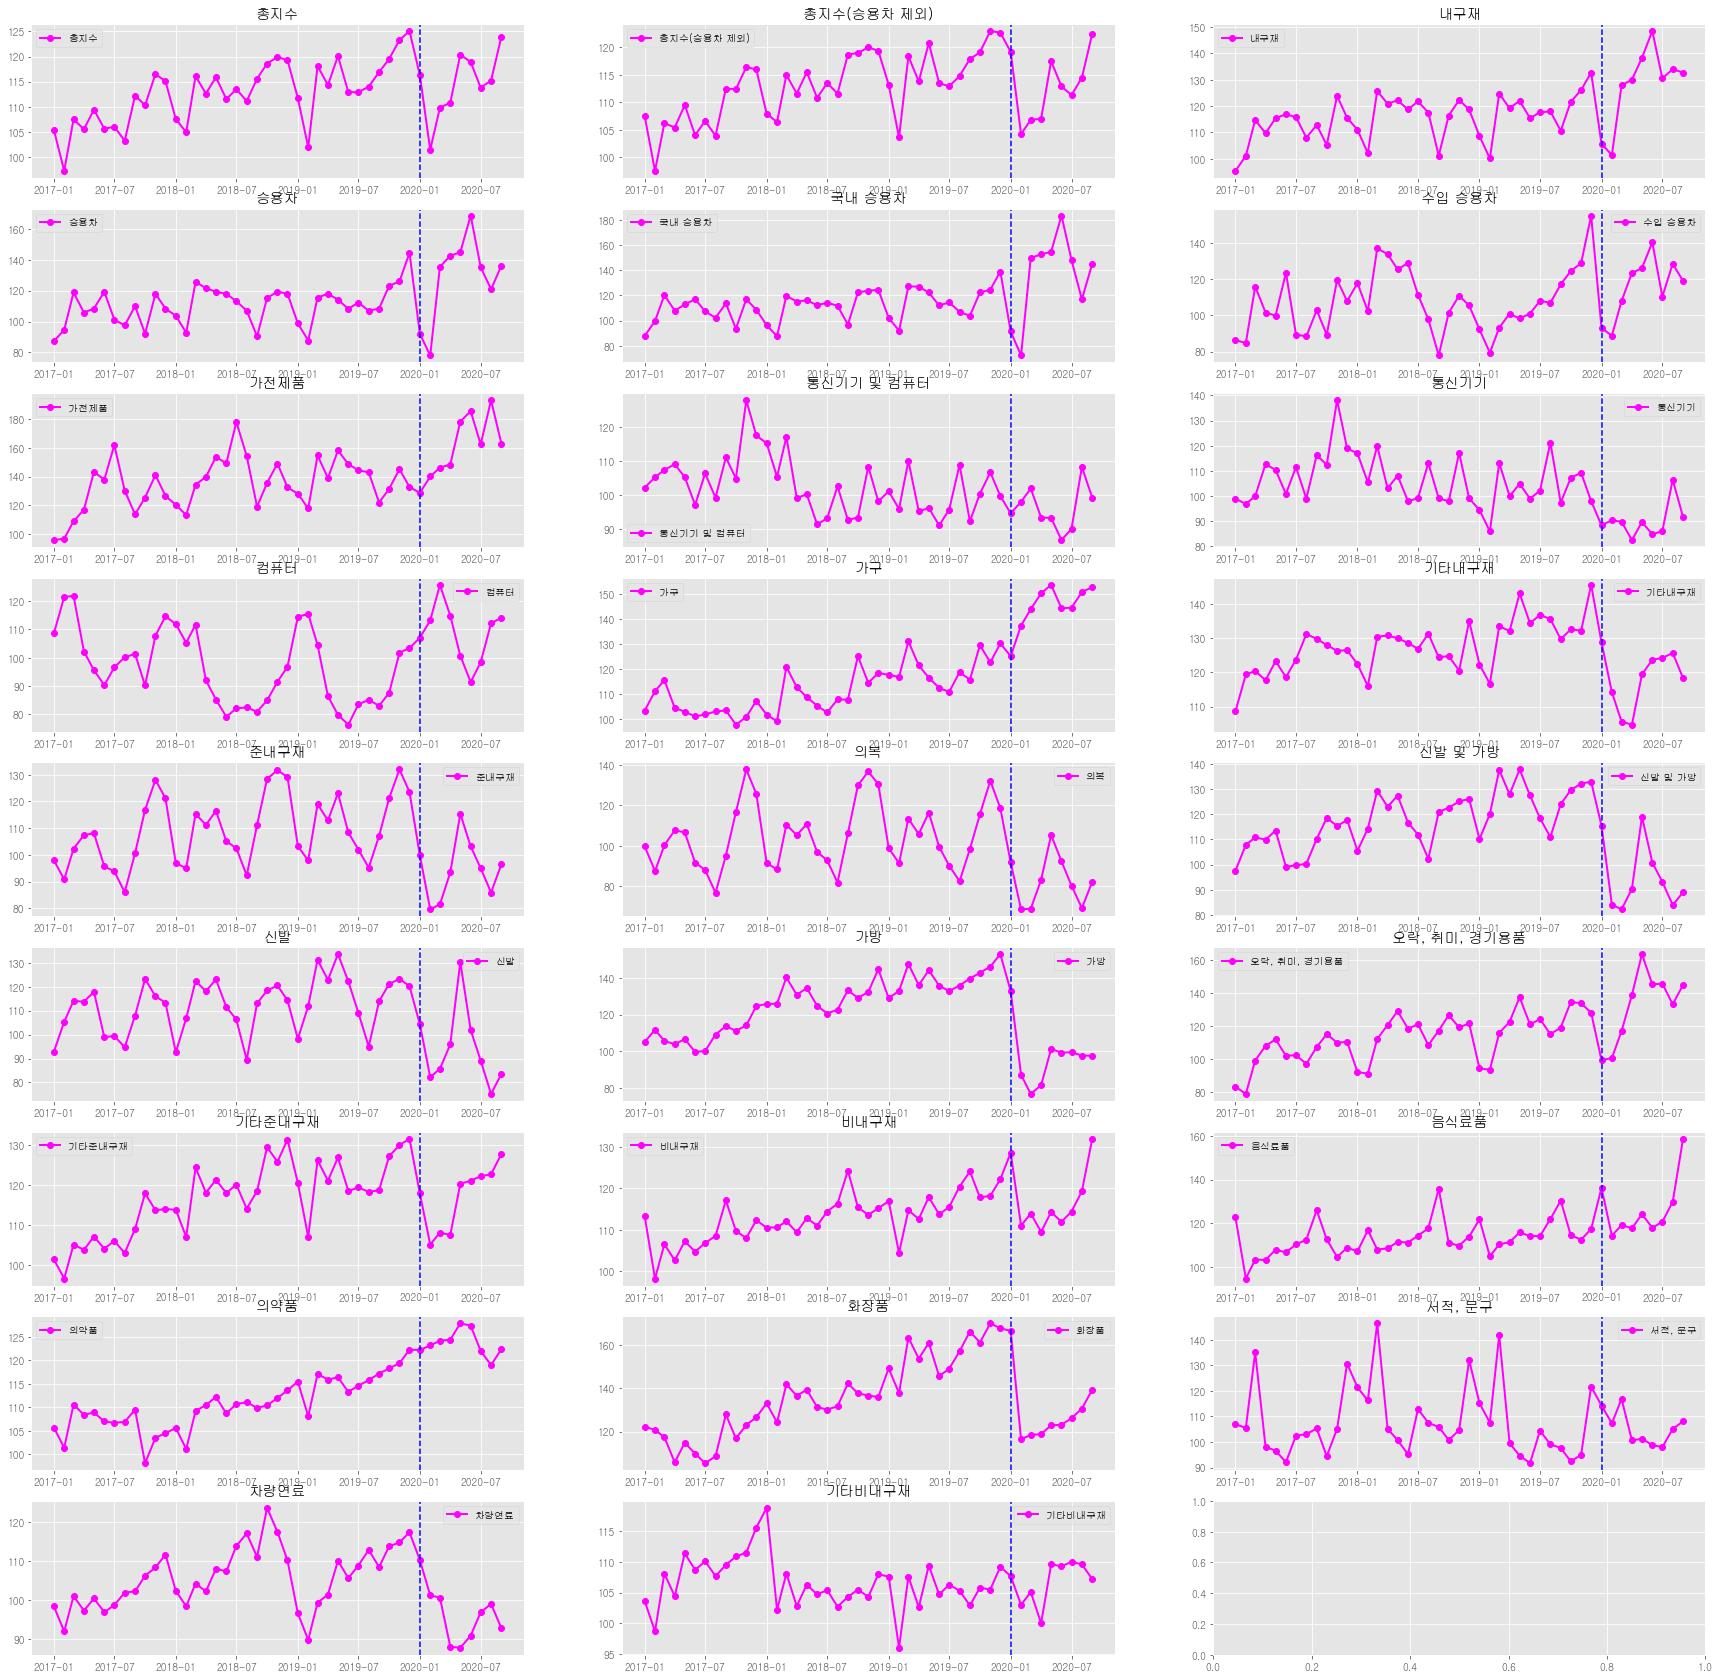

In [33]:

fig, ax = plt.subplots(9,3,figsize=(30,30))
ax = ax.ravel()

for i, j in zip(range(len(ax)), types):
    
    ax[i].plot(np.array(products[['시점']]),np.array(products[j]),marker='o', linewidth=2,label=j,color='magenta')
    ax[i].axvline(x=products['시점'][36],linestyle ='--',color='blue') 
    ax[i].legend()
    

    ax[i].set_title(j)